# Data explorations

## Sound to text check
* sometimes the interviewer is heard and sometimes not
  - Not heard:  0.07 - 0.14 sec 
  - Heard: 60.73 - 61.8 sec 
* clear pause after "and i'm" in the sentence: "and i'm not that good or", at 53.79 - 56.79 sec
  
* Wrong transcription:
  - Data: "and watching". Actually hearing "or and watching", at 72.12 - 72.87 sec
  - Data: "is i kinda had a b- general idea". Actually hearing "is i kinda had a general idea", at 68.02 - 69.67 sec 
  - Data: "and a horse has this little white line". Actually hearing "and a horse has this little white line and you clean it out", at 153.83 - 155.47 sec

Misclassified punctuations:
* so, we're not gonna do the feet today **[,]** i'm gonna wait till like, early in the morning - The **[,]** should be **[.]**
* i mean you get so tired**[.]** n- you just, well, it takes me longer than most people - The **[.]** should be **[,]**
* 6 wrong classified punctionations were found out of 60: **10% Misclassified**
  
#### **Generally the transcription is pretty good**

## Transcription data explorations

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from helper import expand_contractions, read_data

df = read_data()

/tmp/ipykernel_24708/4122922660.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percent_data[index]


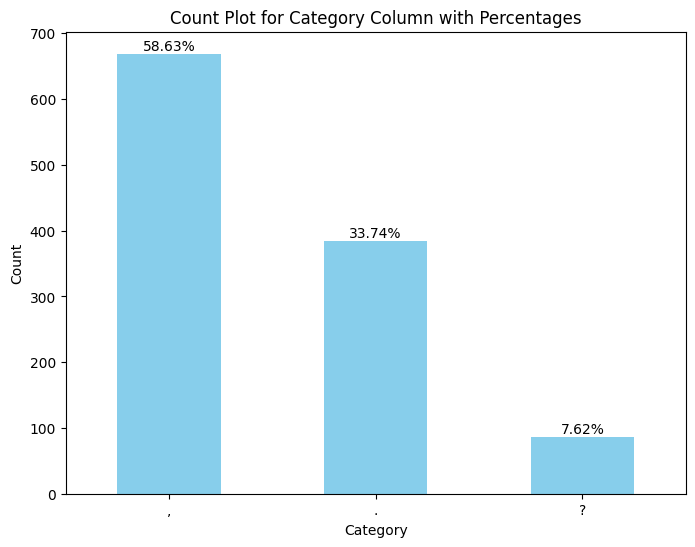

In [88]:
# Count the occurrences of each punctuation
count_data = df['punctuation'].value_counts()

# Calculate the percentages
total_count = count_data.sum()
percent_data = (count_data / total_count) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = count_data.plot(kind='bar', color='skyblue')
plt.title('Count Plot for Category Column with Percentages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add percentage text on the plot bar
for index, value in enumerate(count_data):
    percentage = percent_data[index]
    plt.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

## Is there a assosiation between the sentence recorded time and the punctuation

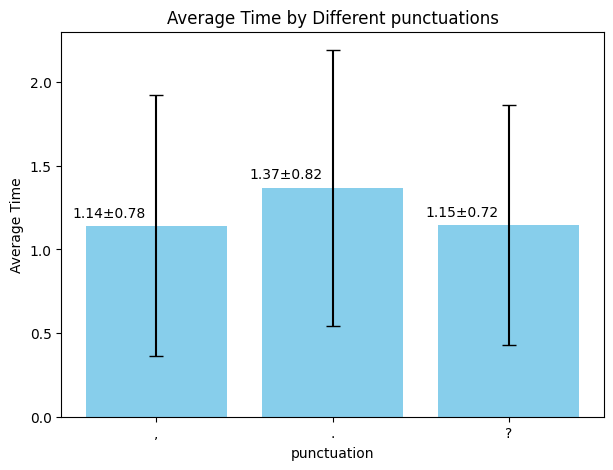

Each in the error range - Not a clear feature


In [89]:
# Group by the 'Split_Text' column and calculate mean and standard error
grouped = df.groupby('punctuation')['time_diff'].agg(['mean', 'std']).reset_index()

# Plotting the results
plt.figure(figsize=(7, 5))
bars = plt.bar(grouped['punctuation'], grouped['mean'], yerr=grouped['std'], color='skyblue', capsize=5)
plt.xlabel('punctuation')
plt.ylabel('Average Time')
plt.title('Average Time by Different punctuations')
plt.xticks(rotation=0)

# Add annotations for mean and std
for bar, mean, std in zip(bars, grouped['mean'], grouped['std']):
    yval = bar.get_height()*1.03
    plt.text(bar.get_x() + bar.get_width() / 6, yval, f'{mean:.2f}±{std:.2f}', ha='center', va='bottom', fontsize=10)


plt.show()
print('Each in the error range - Not a clear feature')

## Is there a assosiation between the sentence length and the punctuation

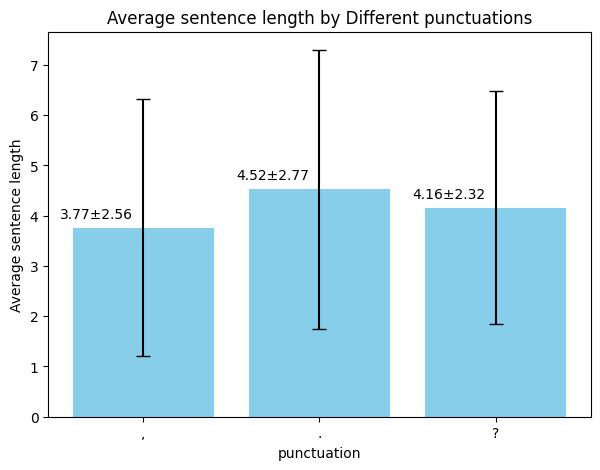

Each in the error range - Not a clear feature


In [90]:
# Group by the 'Split_Text' column and calculate mean and standard error
grouped = df.groupby('punctuation')['sentence_length'].agg(['mean', 'std']).reset_index()

# Plotting the results
plt.figure(figsize=(7, 5))
bars = plt.bar(grouped['punctuation'], grouped['mean'], yerr=grouped['std'], color='skyblue', capsize=5)
plt.xlabel('punctuation')
plt.ylabel('Average sentence length')
plt.title('Average sentence length by Different punctuations')
plt.xticks(rotation=0)

# Add annotations for mean and std
for bar, mean, std in zip(bars, grouped['mean'], grouped['std']):
    yval = bar.get_height()*1.03
    plt.text(bar.get_x() + bar.get_width() / 6, yval, f'{mean:.2f}±{std:.2f}', ha='center', va='bottom', fontsize=10)


plt.show()
print('Each in the error range - Not a clear feature')

## In depth transcript to punctuation analysis

In [2]:
df_punctuation_question_mark = df[df['punctuation'] == '?']
df_punctuation_comma = df[df['punctuation'] == ',']
df_punctuation_period = df[df['punctuation'] == '.']

#### Check word percentage distribution

/tmp/ipykernel_24708/37146145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_uncontraction'] = df['transcript'].apply(


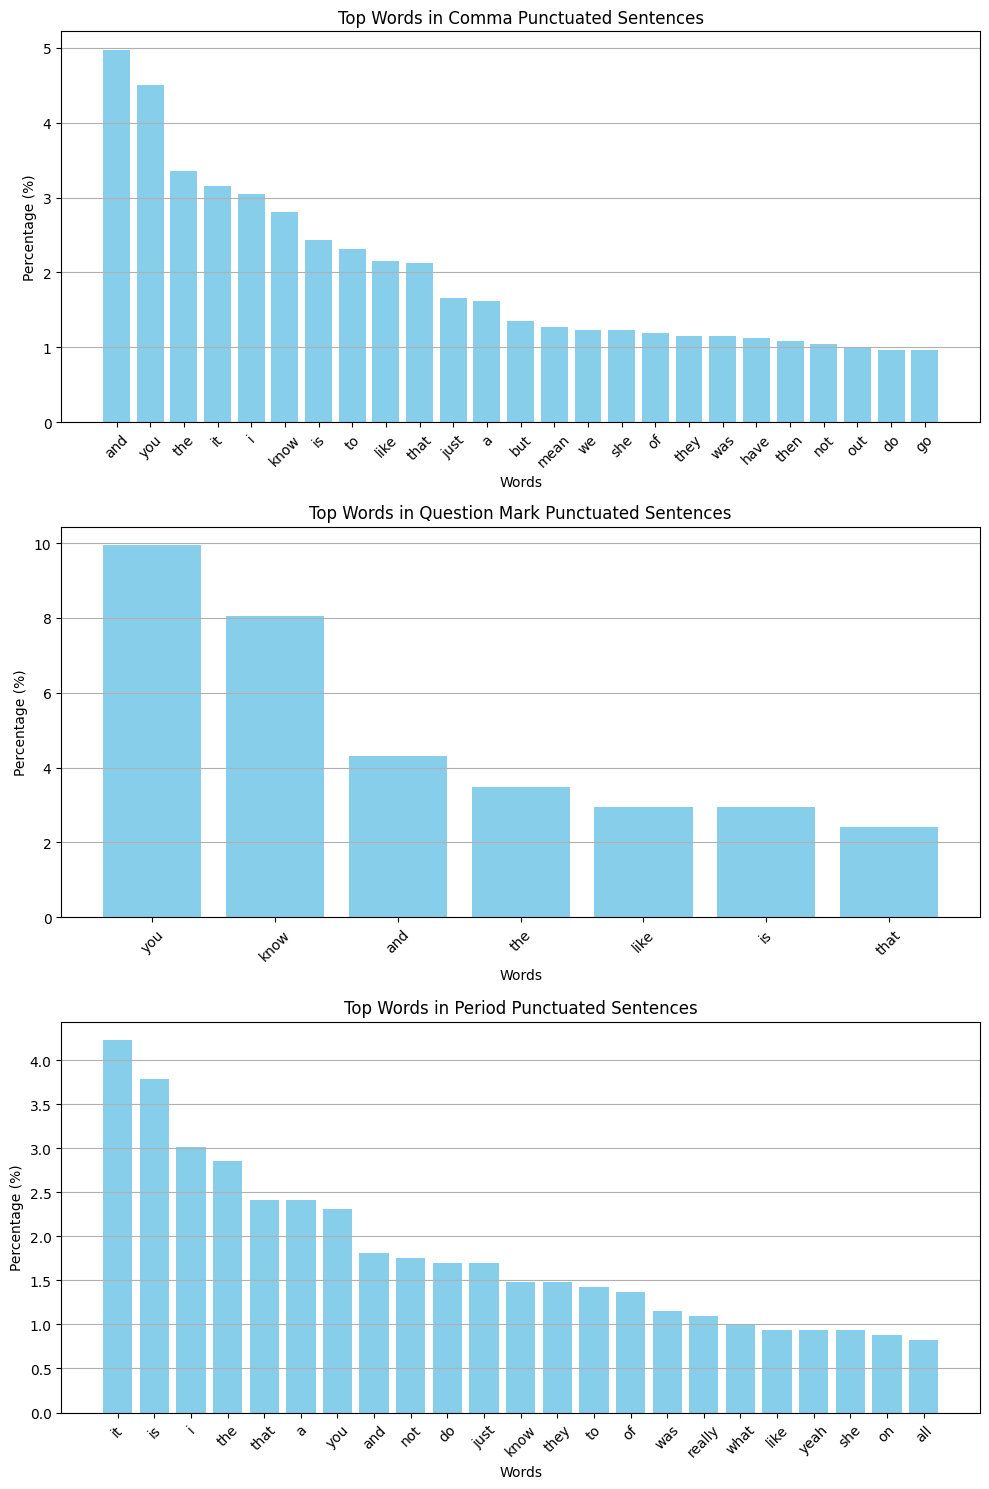

In [127]:

def process_and_plot(df, ax, title):
    
    # Count word occurrences
    word_count = Counter(' '.join(df['t_uncontraction'].to_list()).split())
    
    # Get the total number of words
    total_words = sum(word_count.values())
    
    # Calculate the percentage for each word
    word_percentage = {word: (count / total_words) * 100 for word, count in word_count.items()}
    
    # Sort by percentage
    sorted_word_percentage = sorted(word_percentage.items(), key=lambda x: x[1], reverse=True)
    
    # Calculate the number of words to display (first 5%)
    num_words_to_display = max(1, len(sorted_word_percentage) // 20)
    
    # Select the top words
    top_words = sorted_word_percentage[:num_words_to_display]
    words, percentages = zip(*top_words)  # Unzip the tuples

    # Plotting in the provided axis
    ax.bar(words, percentages, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Percentage (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')


# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

# Process and plot for each dataframe
process_and_plot(df_punctuation_comma, axs[0], 'Top Words in Comma Punctuated Sentences')
process_and_plot(df_punctuation_mark_question, axs[1], 'Top Words in Question Mark Punctuated Sentences')
process_and_plot(df_punctuation_period, axs[2], 'Top Words in Period Punctuated Sentences')

# Adjust layout
plt.tight_layout()
plt.show()

* There is no clear signal.  
* It make sence that in the __Question mark__ words that starts a question like: "Is/Are/Do/Was ...?" and WH question.
    - The "Is" percentage is about the same for all groups.
    - "why" is not appearing in the uestion mark group.

* unique words:
    - question mark calssified unique words - 149
    - comma calssified unique words - 506
    - period calssified unique words - 476

In [238]:
# Calculate embedding with encoder for data visualizations

import torch
from transformers import RobertaTokenizer, RobertaModel

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Function to create embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the mean of the last hidden states as the sentence embedding
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Generate embeddings for all transcripts
embeddings = []
for text in df['t_uncontraction']:
    embedding = get_embeddings(text)
    embeddings.append(embedding)

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### PCA

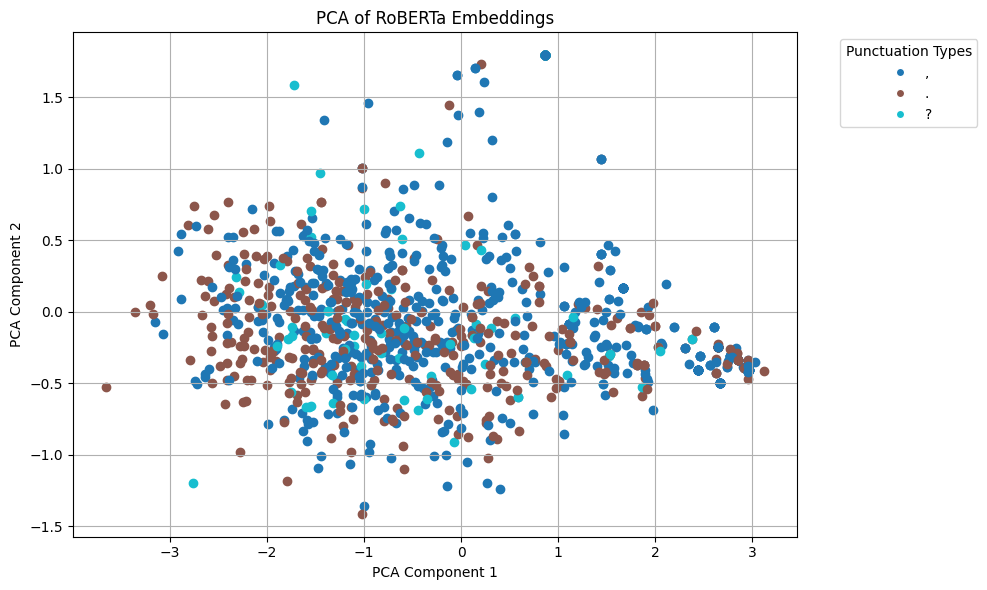

In [239]:
from sklearn.decomposition import PCA


# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_df)

# Create a color mapping for punctuation types
punctuation_types = df['punctuation'].unique()
colors = plt.get_cmap('tab10', len(punctuation_types))  # Use a colormap with distinct colors
color_map = {punctuation: colors(i) for i, punctuation in enumerate(punctuation_types)}


# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 6))
for i, punctuation in enumerate(df['punctuation']):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], color=color_map[punctuation], label=punctuation if i == 0 else "")

# Create a legend for punctuation types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=punctuation, markerfacecolor=color_map[punctuation]) for punctuation in punctuation_types]
plt.legend(title='Punctuation Types', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('PCA of RoBERTa Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.tight_layout()
plt.show()

### Not clear global structure that we can build clustering algorithm. Let's find out if there is local structure, with UMAP

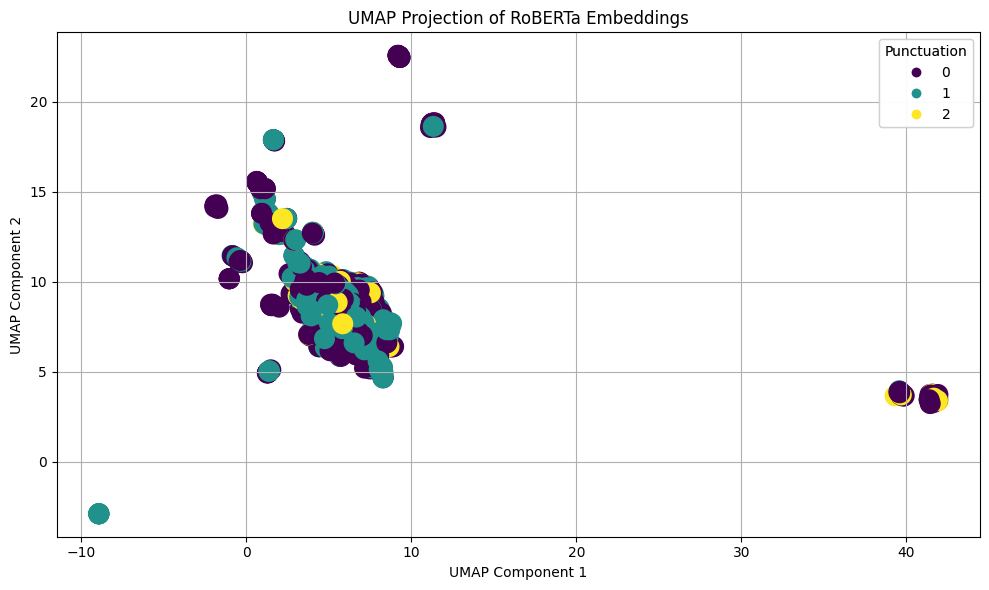

In [240]:
import umap

# Apply UMAP for dimensionality reduction to 2 dimensions
umap_model = umap.UMAP(n_components=2, n_neighbors=10)
umap_result = umap_model.fit_transform(embeddings_df)

# Add UMAP results to the DataFrame
df['UMAP_1'] = umap_result[:, 0]
df['UMAP_2'] = umap_result[:, 1]

# Plotting UMAP results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['UMAP_1'], df['UMAP_2'], c=df['punctuation'].astype('category').cat.codes, cmap='viridis', s=200)

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Punctuation")
plt.gca().add_artist(legend1)
plt.title('UMAP Projection of RoBERTa Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid()
plt.tight_layout()
plt.show()

#### No local structure, with UMAP